# Importing Required Libraries


In [1]:
import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import sklearn

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import scale

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

import warnings

warnings.filterwarnings('ignore')

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='rqb63UTbr7Ir6Av35zhEL0zXDtV3uHruTiE1xdf34miP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'carresalevalueprediction-donotdelete-pr-hbr3tzysdodn7b'
object_key = 'autos.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head(10)


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,3/24/2016 0:00,0.0,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,3/24/2016 0:00,0.0,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,3/14/2016 0:00,0.0,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,3/17/2016 0:00,0.0,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,3/31/2016 0:00,0.0,60437.0,4/6/2016 10:17
5,4/4/2016 17:36,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,3er,150000,10.0,benzin,bmw,ja,4/4/2016 0:00,0.0,33775.0,4/6/2016 19:17
6,4/1/2016 20:48,Peugeot_206_CC_110_Platinum,privat,Angebot,2200.0,test,cabrio,2004.0,manuell,109.0,2_reihe,150000,8.0,benzin,peugeot,nein,4/1/2016 0:00,0.0,67112.0,4/5/2016 18:18
7,3/21/2016 18:54,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0.0,test,limousine,1980.0,manuell,50.0,andere,40000,7.0,benzin,volkswagen,nein,3/21/2016 0:00,0.0,19348.0,3/25/2016 16:47
8,4/4/2016 23:42,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500.0,control,bus,2014.0,manuell,125.0,c_max,30000,8.0,benzin,ford,NaN,4/4/2016 0:00,0.0,94505.0,4/4/2016 23:42
9,3/17/2016 10:53,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999.0,test,kleinwagen,1998.0,manuell,101.0,golf,150000,0.0,NaN,volkswagen,NaN,3/17/2016 0:00,0.0,27472.0,3/31/2016 17:17


# Reading the Dataset

In [3]:
df.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,3/24/2016 0:00,0.0,70435.0,4/7/2016 3:16
1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,3/24/2016 0:00,0.0,66954.0,4/7/2016 1:46
2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,3/14/2016 0:00,0.0,90480.0,4/5/2016 12:47
3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,3/17/2016 0:00,0.0,91074.0,3/17/2016 17:40
4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,3/31/2016 0:00,0.0,60437.0,4/6/2016 10:17
5,4/4/2016 17:36,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,3er,150000,10.0,benzin,bmw,ja,4/4/2016 0:00,0.0,33775.0,4/6/2016 19:17
6,4/1/2016 20:48,Peugeot_206_CC_110_Platinum,privat,Angebot,2200.0,test,cabrio,2004.0,manuell,109.0,2_reihe,150000,8.0,benzin,peugeot,nein,4/1/2016 0:00,0.0,67112.0,4/5/2016 18:18
7,3/21/2016 18:54,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0.0,test,limousine,1980.0,manuell,50.0,andere,40000,7.0,benzin,volkswagen,nein,3/21/2016 0:00,0.0,19348.0,3/25/2016 16:47
8,4/4/2016 23:42,Ford_C___Max_Titanium_1_0_L_EcoBoost,privat,Angebot,14500.0,control,bus,2014.0,manuell,125.0,c_max,30000,8.0,benzin,ford,NaN,4/4/2016 0:00,0.0,94505.0,4/4/2016 23:42
9,3/17/2016 10:53,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Angebot,999.0,test,kleinwagen,1998.0,manuell,101.0,golf,150000,0.0,NaN,volkswagen,NaN,3/17/2016 0:00,0.0,27472.0,3/31/2016 17:17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371539 entries, 0 to 371538
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371539 non-null  object 
 1   name                 371539 non-null  object 
 2   seller               371538 non-null  object 
 3   offerType            371538 non-null  object 
 4   price                371538 non-null  float64
 5   abtest               371538 non-null  object 
 6   vehicleType          333669 non-null  object 
 7   yearOfRegistration   371537 non-null  float64
 8   gearbox              351329 non-null  object 
 9   powerPS              371538 non-null  float64
 10  model                351054 non-null  object 
 11  kilometer            371538 non-null  object 
 12  monthOfRegistration  371537 non-null  float64
 13  fuelType             338151 non-null  object 
 14  brand                371537 non-null  object 
 15  notRepairedDamage

In [5]:
df.shape

(371539, 20)

# Cleaning the Dataset

In [6]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [7]:
# Rearranging the Columns
df = df[['dateCrawled', 'name', 'seller', 'offerType', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen', 'price']]

In [8]:
# Droping the Unwanted Columns
df.drop(columns= ['seller', 'offerType', 'nrOfPictures'], inplace = True)

In [9]:
df.drop(columns= ['name','dateCrawled', 'dateCreated', 'lastSeen'], inplace = True)

# Missing Values

In [10]:
# Checking for Missing Values
df.isna().sum()

abtest                     1
vehicleType            37870
yearOfRegistration         2
gearbox                20210
powerPS                    1
model                  20485
kilometer                  1
monthOfRegistration        2
fuelType               33388
brand                      2
notRepairedDamage      72062
postalCode                 2
price                      1
dtype: int64

In [11]:
# Removing Missing Values
df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace = True)
df['gearbox'].fillna(df['gearbox'].mode()[0], inplace = True)
df['model'].fillna(df['model'].mode()[0], inplace = True)
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace = True)
df['notRepairedDamage'].fillna(df['notRepairedDamage'].mode()[0], inplace = True)
df.dropna(inplace=True)

In [12]:
df.isna().sum()

abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
price                  0
dtype: int64

# Duplicate Values

In [13]:
# Checking for Duplicates
df.duplicated().sum()

13871

In [14]:
# Removing Duplicates
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

# Label Encoding

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357666 entries, 0 to 371538
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   abtest               357666 non-null  object 
 1   vehicleType          357666 non-null  object 
 2   yearOfRegistration   357666 non-null  float64
 3   gearbox              357666 non-null  object 
 4   powerPS              357666 non-null  float64
 5   model                357666 non-null  object 
 6   kilometer            357666 non-null  object 
 7   monthOfRegistration  357666 non-null  float64
 8   fuelType             357666 non-null  object 
 9   brand                357666 non-null  object 
 10  notRepairedDamage    357666 non-null  object 
 11  postalCode           357666 non-null  float64
 12  price                357666 non-null  float64
dtypes: float64(5), object(8)
memory usage: 38.2+ MB


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['abtest'] = le.fit_transform(df['abtest'])
df['vehicleType'] = le.fit_transform(df['vehicleType'])
df['gearbox'] = le.fit_transform(df['gearbox'])
df['model'] = le.fit_transform(df['model'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['brand'] = le.fit_transform(df['brand'])
df['notRepairedDamage'] = df['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357666 entries, 0 to 371538
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   abtest               357666 non-null  int64  
 1   vehicleType          357666 non-null  int64  
 2   yearOfRegistration   357666 non-null  float64
 3   gearbox              357666 non-null  int64  
 4   powerPS              357666 non-null  float64
 5   model                357666 non-null  int64  
 6   kilometer            357666 non-null  object 
 7   monthOfRegistration  357666 non-null  float64
 8   fuelType             357666 non-null  int64  
 9   brand                357666 non-null  int64  
 10  notRepairedDamage    357666 non-null  int64  
 11  postalCode           357666 non-null  float64
 12  price                357666 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 38.2+ MB


# Identifying and Handling Outliers

In [19]:
df.skew()

abtest                  -0.071543
vehicleType             -0.877858
yearOfRegistration      72.032138
gearbox                 -1.447581
powerPS                 57.494171
model                    0.407475
kilometer               -1.557093
monthOfRegistration      0.082125
fuelType                 1.486610
brand                   -0.150856
notRepairedDamage        2.681597
postalCode               0.057374
price                  567.172820
dtype: float64

In [20]:
df.yearOfRegistration=df.yearOfRegistration.clip(lower=df.yearOfRegistration.quantile(0.05),upper=df.yearOfRegistration.quantile(0.95))

df.price=df.price.clip(lower=df.price.quantile(0.05),upper=df.price.quantile(0.95))

df.powerPS=df.powerPS.clip(lower=df.powerPS.quantile(0.05),upper=df.powerPS.quantile(0.95))

In [21]:
df.skew()

abtest                -0.071543
vehicleType           -0.877858
yearOfRegistration     0.159447
gearbox               -1.447581
powerPS                0.076956
model                  0.407475
kilometer             -1.557093
monthOfRegistration    0.082125
fuelType               1.486610
brand                 -0.150856
notRepairedDamage      2.681597
postalCode             0.057374
price                  1.421754
dtype: float64

# Visualization

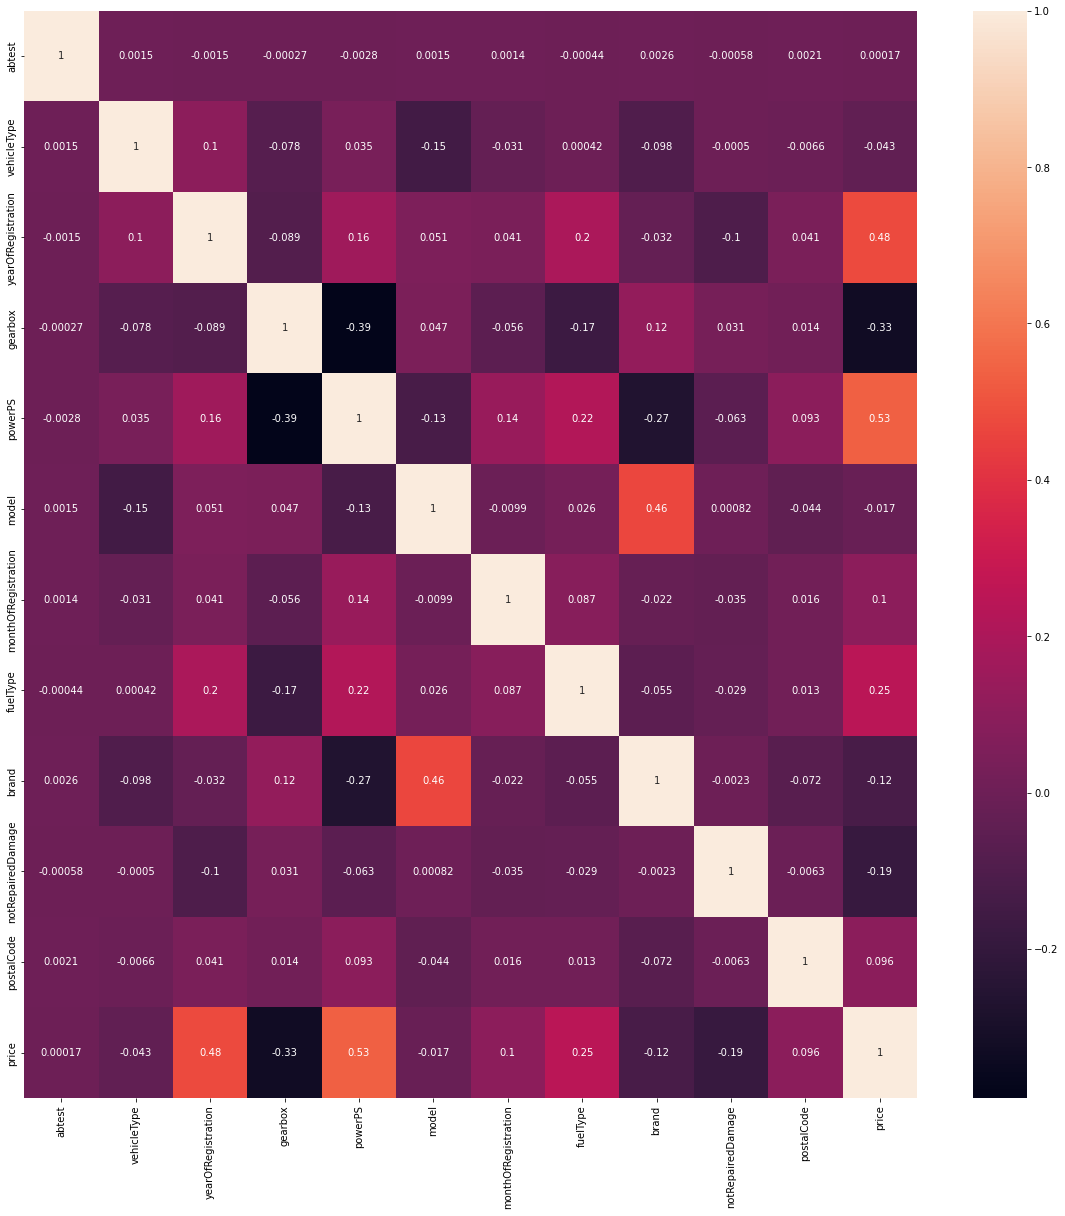

In [22]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

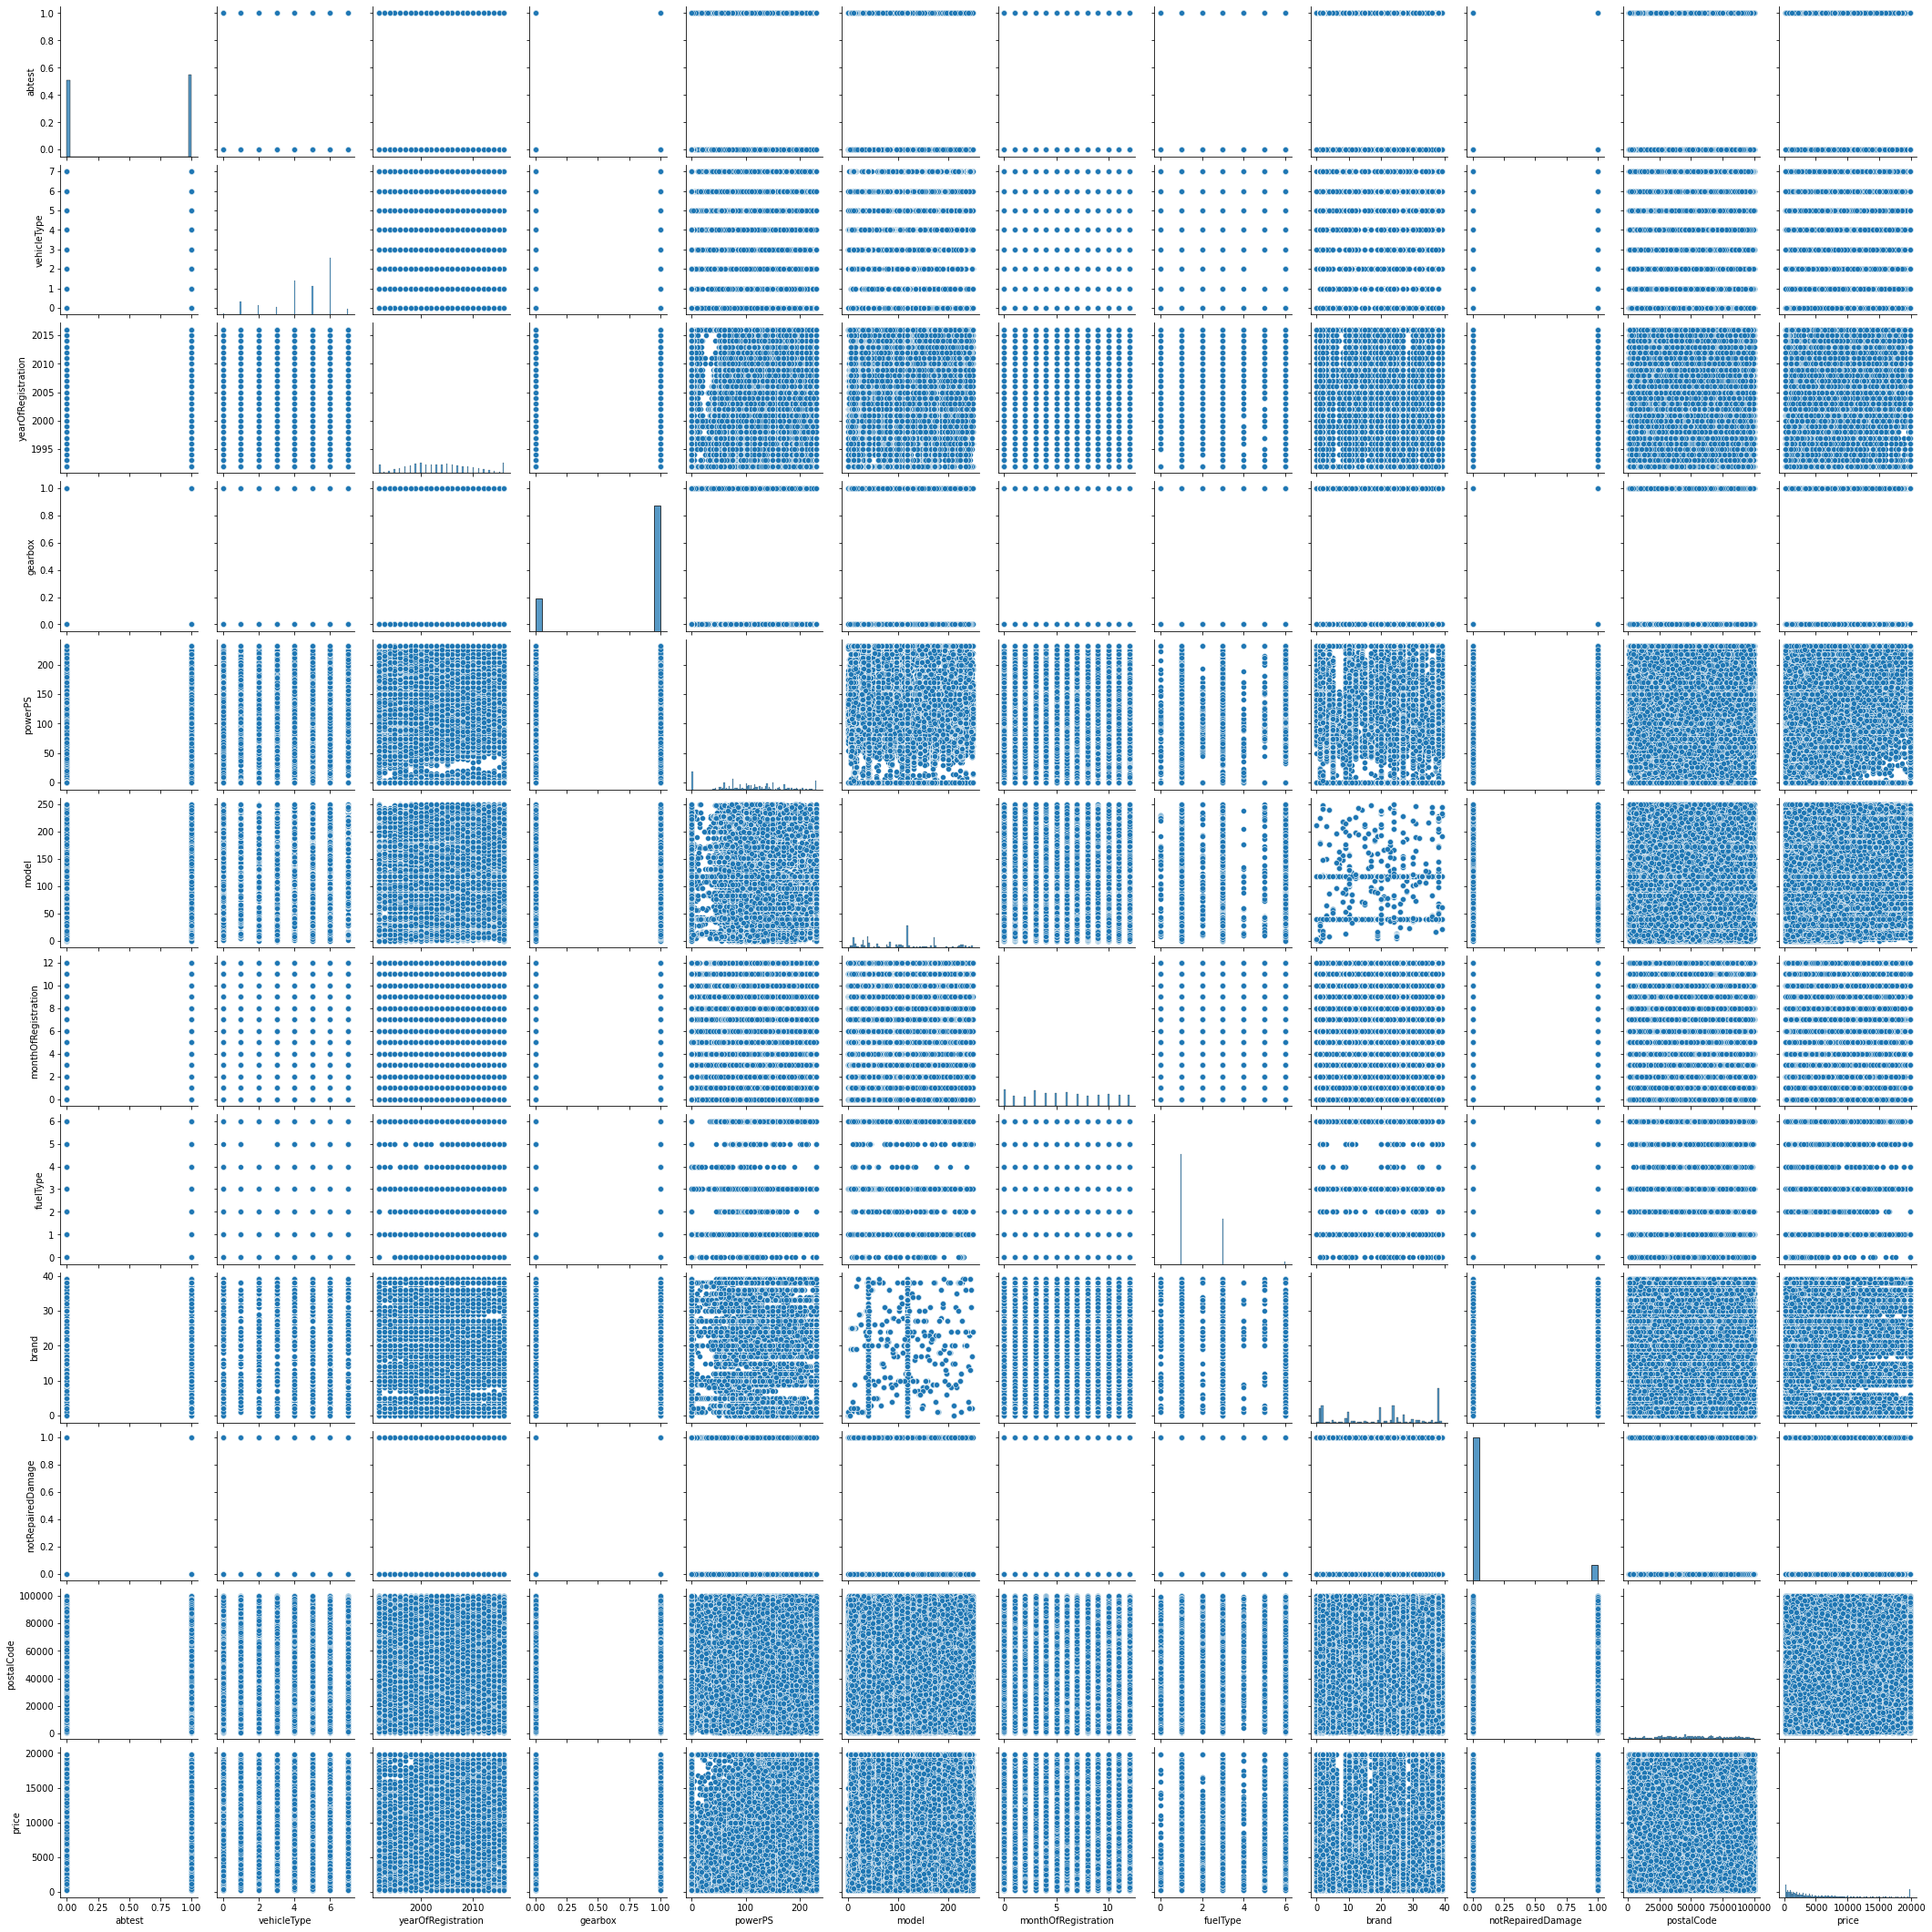

In [23]:
sns.pairplot(df)
plt.show()

# Descriptive Statistics

In [24]:
df.nunique()

abtest                    2
vehicleType               8
yearOfRegistration       25
gearbox                   2
powerPS                 232
model                   251
kilometer                26
monthOfRegistration      13
fuelType                  7
brand                    40
notRepairedDamage         2
postalCode             8150
price                  3590
dtype: int64

In [25]:
df.describe()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,price
count,357666.000000,357666.000000,357666.000000,357666.000000,357666.000000,357666.000000,357666.000000,357666.000000,357666.000000,357666.000000,357666.000000,357666.000000
mean,0.517874,4.565421,2003.687398,0.793162,108.619366,101.818263,5.720382,1.654292,20.685402,0.099199,50960.261121,5121.626968
std,0.499681,1.683895,6.407060,0.405039,61.340685,69.757556,3.713295,1.051057,13.355147,0.298929,25795.118670,5468.609165
min,0.000000,0.000000,1992.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1067.000000,200.000000
25%,0.000000,4.000000,1999.000000,1.000000,69.000000,40.000000,3.000000,1.000000,9.000000,0.000000,30635.500000,1111.000000
50%,1.000000,5.000000,2003.000000,1.000000,105.000000,104.000000,6.000000,1.000000,23.000000,0.000000,49688.000000,2950.000000
75%,1.000000,6.000000,2008.000000,1.000000,150.000000,153.000000,9.000000,3.000000,33.000000,0.000000,71686.000000,7100.000000
max,1.000000,7.000000,2016.000000,1.000000,231.000000,250.000000,12.000000,6.000000,39.000000,1.000000,99998.000000,19850.000000


In [26]:
df.skew()

abtest                -0.071543
vehicleType           -0.877858
yearOfRegistration     0.159447
gearbox               -1.447581
powerPS                0.076956
model                  0.407475
kilometer             -1.557093
monthOfRegistration    0.082125
fuelType               1.486610
brand                 -0.150856
notRepairedDamage      2.681597
postalCode             0.057374
price                  1.421754
dtype: float64

In [27]:
df.kurt()

abtest                -1.994893
vehicleType           -0.132323
yearOfRegistration    -0.677661
gearbox                0.095491
powerPS               -0.420649
model                 -0.895413
kilometer              1.241116
monthOfRegistration   -1.141833
fuelType               2.197371
brand                 -1.325632
notRepairedDamage      5.190990
postalCode            -0.977294
price                  1.060353
dtype: float64

# Splitting the Data

In [28]:
# Splitting x and y variables
x = df.drop(columns = 'price')
y = df['price']

In [29]:
# Splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train[x_train.index==142236]

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode


In [30]:
x_train.kilometer.astype('int')

249167    150000
250668    150000
191151     80000
264881    150000
182855    125000
           ...  
124717    150000
313982    150000
154730    150000
119954    150000
315667    150000
Name: kilometer, Length: 286132, dtype: int64

# Building Models

## Linear Regression 

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

## Lasso Regression

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(x_train, y_train)

Lasso(alpha=0.01, normalize=True)

## Decision Tree 

In [33]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

## KNN 

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

# Checking the Metrics of the models

In [36]:
# Linear Regression
lr.score(x_test, y_test)

0.5816124677375079

In [37]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))

3539.2833303719335

In [38]:
# Lasso Regression
lasso.score(x_test, y_test)

0.581594327266497

In [39]:
np.sqrt(mean_squared_error(y_test,lasso.predict(x_test)))

3539.360057766723

In [40]:
# K Nearest Neighbour
knn.score(x_test, y_test)

0.5146334692972387

In [41]:
np.sqrt(mean_squared_error(y_test,knn.predict(x_test)))

3812.0700820627335

In [42]:
# Decision Tree
DT.score(x_test, y_test)

0.7623586407900571

In [43]:
np.sqrt(mean_squared_error(y_test,DT.predict(x_test)))

2667.3928169453884

In [44]:
# Random Forest
RF.score(x_test, y_test)

0.8710491893611683

In [45]:
np.sqrt(mean_squared_error(y_test,RF.predict(x_test)))

1964.8889115017648

# Evaluating Performance Of The Model And Saving The Model

## Random Forest Model is Selected 

In [46]:
RF.score(x_test, y_test)

0.8710491893611683

# Saving The Model 

In [47]:
pickle.dump(RF, open('MODEL.pkl', 'wb'))

In [48]:
!pip install ibm_watson_machine_learning

In [49]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"CfDUcJPiNifKOS66z3JgWMTASTRiMkSGq4oOCs1L8PJz"
}
client = APIClient(wml_credentials)

In [50]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item ['entity']["name"] == space_name)['metadata']['id'])

In [51]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = " + space_uid)

Space UID = 1914d34a-2287-4331-93e9-c130f33230ec


In [52]:
client.set.default_space(space_uid)

'SUCCESS'

In [53]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [54]:
soft_id=client.software_specifications.get_uid_by_name('runtime-22.1-py3.9')
meta_props={
     client.repository.ModelMetaNames.NAME: 'crvp',
     client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: soft_id,
     client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0'
}

In [55]:
model_details = client.repository.store_model(model=RF, meta_props=meta_props)

In [56]:
model_id=client.repository.get_model_id(model_details)
model_id

'7de89f57-33fe-41ca-981e-a5ab694ad081'